## $\gamma - \gamma$ coincidence data analysis

 - In a multi-detector array, detectors placed at different angles are essentially equivalent ( ignoring $\theta, \phi$ dependence)
 -  In the analysis of data from such arrays, one often creates two-dimensional histograms from double-coincidence data, or three-dimensional histograms from triple-coincidence data, and then proceeds to set ''gates'', i.e. specify energies for all but one of the axes and inspect the projection onto the remaining axis. 
 
 ![](gamma_array.png)
 ![](ggmatrix.png)


### Data：data/gamma-gamma/eb01.root-eb05.root @ course server

 - Branch：ahit, aid[ahit], ae[hit], at[hit]

### Source: 152Eu

### Detectors & Electronics: Eurica array with 100Mhz, 14bit DGF-4C digitizer: energy , time 25ns/bin

### Trigger: 1kHz Clock

### Energy & time widow: $100\mu s$ after trigger.

![](trigger.png)
![](level1.png)
![](level2.png)

In [1]:
TCanvas *c1=new TCanvas("c1","c1");
TFile *fin=new TFile("eb01.root");
TTree *tree1=(TTree*) fin->Get("tree");

In [2]:
tree1->Scan("aid:ae:at:ahit","","",1,1);

***********************************************************************
*    Row   * Instance *       aid *        ae *        at *      ahit *
***********************************************************************
*        1 *        0 *         0 * 93.738891 * -67481.71 *         5 *
*        1 *        1 *        14 * 513.18847 * -38606.70 *         5 *
*        1 *        2 *        35 * 255.53135 * -11531.70 *         5 *
*        1 *        3 *        42 * 191.77148 * -11581.70 *         5 *
*        1 *        4 *        70 * 900.86627 * -16131.70 *         5 *
***********************************************************************


In [3]:
.L peaks.C

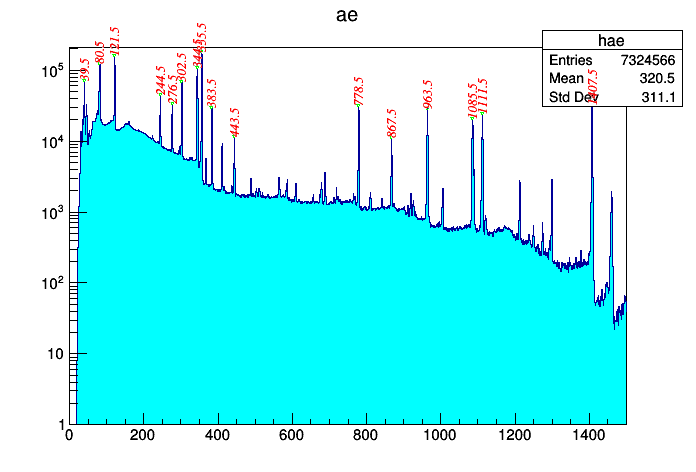

In [4]:
tree->Draw("ae>>hae(1500,0,1500)");
peaks("hae");
c1->SetLogy();
c1->Draw();

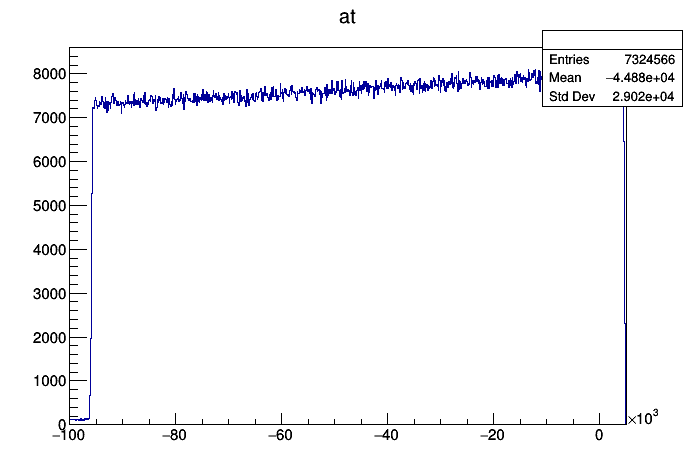

In [5]:
tree->Draw("at>>(1000,-100000,5000)");
c1->SetLogy(0);
c1->Draw();

[root0] tree->MakeClass("gm")

### 编辑 gm.C 

```cpp

#define gm_cxx
#include "gm.h"
#include <TH2.h>
#include <TStyle.h>
#include <TCanvas.h>

void gm::Loop()
{

  int achit;
  double aex[1000],aey[1000],atx[1000],aty[1000];
  TFile *fout=new TFile("ebc01.root","RECREATE");
  TTree *tout=new TTree("tree","tree");
  tout->Branch("achit",&achit,"achit/I");
  tout->Branch("aex",&aex,"aex[achit]/D");
  tout->Branch("aey",&aey,"aey[achit]/D");
  tout->Branch("atx",&atx,"atx[achit]/D");
  tout->Branch("aty",&aty,"aty[achit]/D");
   if (fChain == 0) return;

   Long64_t nentries = fChain->GetEntriesFast();

   Long64_t nbytes = 0, nb = 0;
   for (Long64_t jentry=0; jentry<nentries;jentry++) {
      Long64_t ientry = LoadTree(jentry);
      if (ientry < 0) break;
      nb = fChain->GetEntry(jentry);   nbytes += nb;
      achit=0;
     for(int i=0; i<ahit; i++) {
        for(int j=0; j<ahit; j++) {
            if(i==j) continue;
            aex[achit]=ae[i];
            aey[achit]=ae[j];
            atx[achit]=at[i];
            aty[achit]=at[j];
            achit++;
        }
     }
    if(achit>0) tout->Fill();
    if(jentry%10000==0) cout<<jentry<<endl;;
   }
   tout->Write();
   fout->Close();
}

```

[root1] .L gm.C

[root2] gm t

[root3] t.Loop()

生成 ebc01.root

In [6]:
TFile *fg=new TFile("ebc01.root");
TTree *tree=(TTree*) fg->Get("tree");
//gStyle->SetPalette(1);

In [7]:
tree->Scan("aex:aey:atx:aty:achit","","",1,0);

***********************************************************************************
*    Row   * Instance *       aex *       aey *       atx *       aty *     achit *
***********************************************************************************
*        0 *        0 * 93.738891 * 513.18847 * -67481.71 * -38606.70 *        20 *
*        0 *        1 * 93.738891 * 255.53135 * -67481.71 * -11531.70 *        20 *
*        0 *        2 * 93.738891 * 191.77148 * -67481.71 * -11581.70 *        20 *
*        0 *        3 * 93.738891 * 900.86627 * -67481.71 * -16131.70 *        20 *
*        0 *        4 * 513.18847 * 93.738891 * -38606.70 * -67481.71 *        20 *
*        0 *        5 * 513.18847 * 255.53135 * -38606.70 * -11531.70 *        20 *
*        0 *        6 * 513.18847 * 191.77148 * -38606.70 * -11581.70 *        20 *
*        0 *        7 * 513.18847 * 900.86627 * -38606.70 * -16131.70 *        20 *
*        0 *        8 * 255.53135 * 93.738891 * -11531.70 * -67481.71 *     

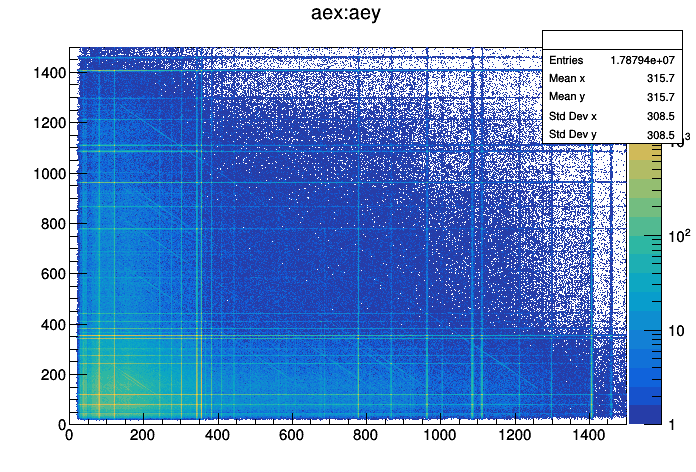

In [8]:
tree->Draw("aex:aey>>(1500,0,1500,1500,0,1500)","","colz");//gg coincidence matrix 
c1->SetLogz();
c1->Draw();

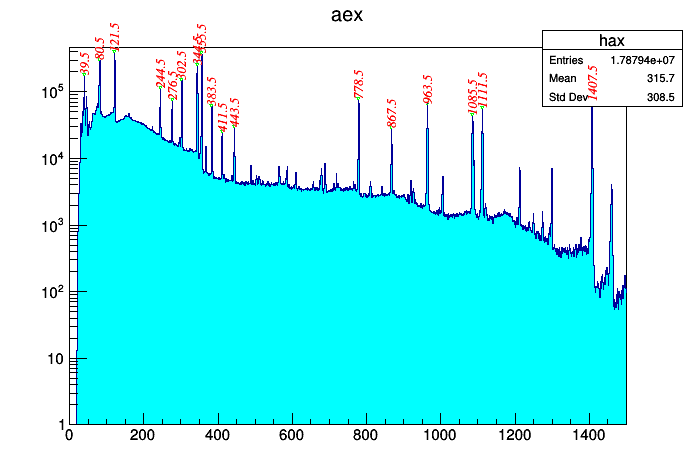

In [9]:
tree->Draw("aex>>hax(1500,0,1500)","","colz");//total projection spectrum
peaks("hax");
c1->SetLogy();
c1->Draw();

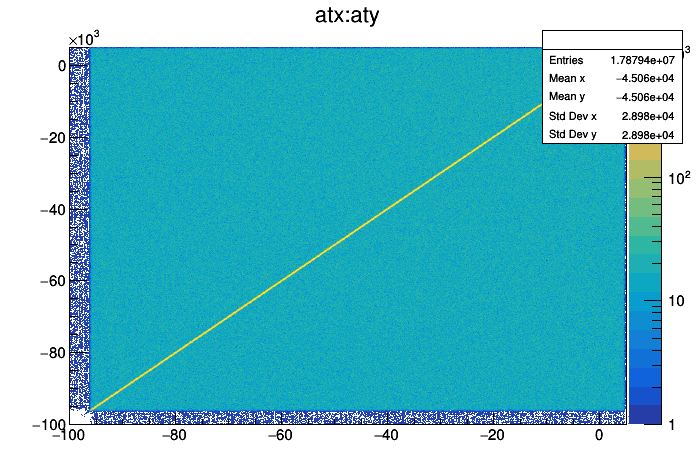

In [10]:
tree->Draw("atx:aty>>(1000,-100000,5000,1000,-100000,5000)","","colz"); //time correlation
c1->SetLogy(0);
c1->SetLogz();
c1->Draw();

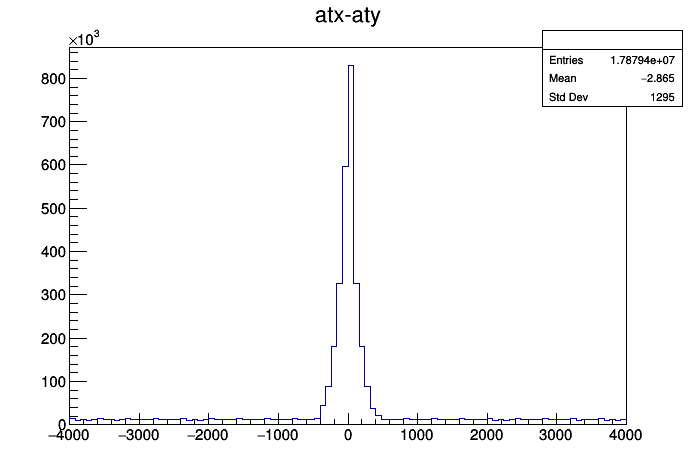

In [11]:
tree->Draw("atx-aty>>(100,-4000,4000)","","colz");//coincidence window
c1->Draw();

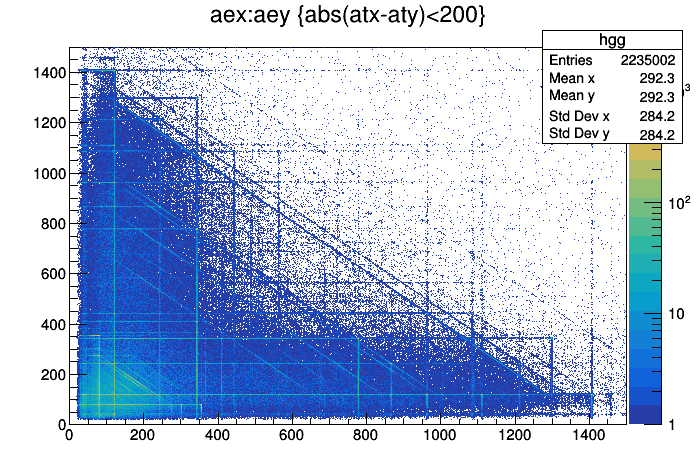

In [12]:
tree->Draw("aex:aey>>hgg(1500,0,1500,1500,0,1500)","abs(atx-aty)<200","colz");//gg matrix with time coincidence 
c1->SetLogz();
c1->Draw();//在k=1的直线上有交叉点！

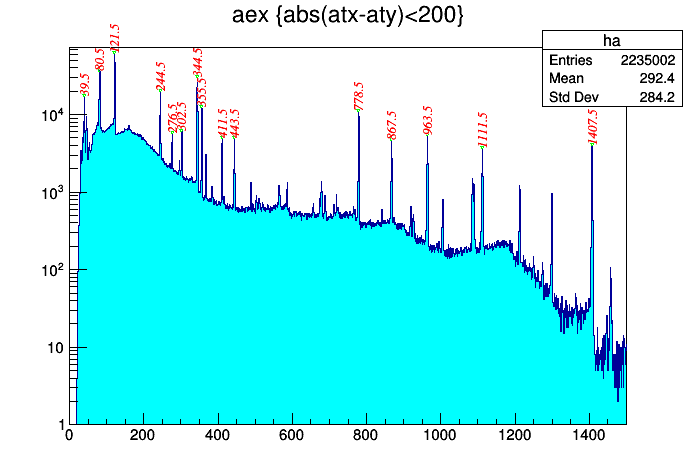

In [13]:
tree->Draw("aex>>ha(1500,0,1500)","abs(atx-aty)<200","colz");//total projection spectrum
peaks("ha");
c1->SetLogy();
c1->Draw();

In [14]:
int ih=0;
double ge,gea,geb;
TH1D *hg;
TString hname;

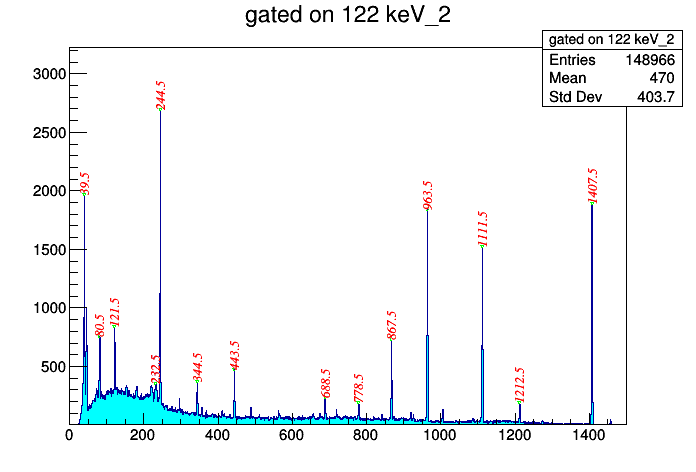

In [24]:
//gated on 121.5keV
ge=122.5;
dge=2;
gea=hgg->GetXaxis()->FindBin(ge-dge);
geb=hgg->GetXaxis()->FindBin(ge+dge); 
hname.Form("gated on %d keV_%i",int(ge),ih++);
hg=hgg->ProjectionX(hname,gea,geb);
hg->SetTitle(hname);
peaks(hname);
c1->Draw();//obivous 121.5keV peak !!!!

- 用上述方式构建的二维$\gamma-\gamma$矩阵有本底，需要进一步扣除.

In [16]:
TSpectrum *sa=new TSpectrum(200);
TH1F *htpj,*hbg,*hpeak;

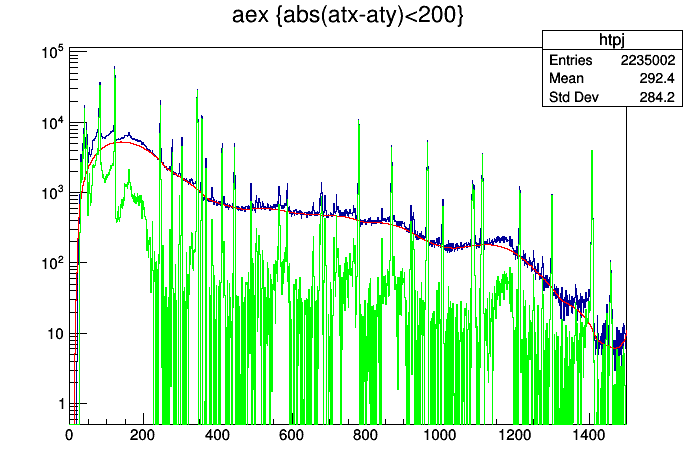

In [17]:
//Generate Smooth Background under peaks.
tree->Draw("aex>>htpj(1500,0,1500)","abs(atx-aty)<200","colz");//total projection spectrum
htpj=(TH1F*)gROOT->FindObject("htpj");//total projection
hbg=(TH1F*)sa->Background(ha,20,"same");//background
hbg->SetFillColor(kWhite);
hpeak=new TH1F("hpeak","hpeak",1500,0,1500);
hpeak->Add(htpj,hbg,1,-1);//peaks 
hpeak->SetLineColor(kGreen);
hpeak->Draw("same");
c1->SetLogy();
c1->Draw();

### Background Substraction in $M_{ij}$ gg matrix
For $i_{th}$ bin of the total 1D projection of two-fold coincidence matrix $M_{ij}$, the total counts $𝑃_i$ can be divided into a “background” spectrum $b_i$ and a “peak” spectrum $p_i$ :     $P_i=b_i+p_i$。The background counts underlying the peaks arise from both Compton-scattered γ-rays and quasi-continuum transitions.
![](background.png)
$$P_i=\sum_{j} M_{ij}, \quad T=\sum_{j}P_j $$

For the two-fold background matrix $B_{ij}$:

$$b_i=\sum_{j} B_{ij} = b_i \frac{\sum_{j} P_j}{T}=\sum_{j}{\frac{1}{T} b_i P_j}$$ 
$$B_{ij}=\frac{1}{T}b_i P_j=\frac{1}{T}b_i(p_j+b_j)=\frac{1}{T}(b_i p_j+b_i b_j)$$

But the term of $b_j p_i$ is not include in the equation above, so that $B_{ij}$ is asymmetric. The symmetric 2D background can be written as: 
$$B_{ij}=\frac{1}{T}(b_i p_j+b_j p_i+b_i b_j)=\frac{1}{T}(P_i P_j-p_i p_j)$$

Refer to https://github.com/zhihuanli/gamma-gamma-coincidence-analysis/tree/master/prompt%20gg


In [18]:
TH2F* hggb=new TH2F("ggbmat","bgmat for gg",1500,0,1500,1500,0,1500);
TH2F* hggmat=new TH2F("ggmat","ggmat with backsub",1500,0,1500,1500,0,1500);
Double_t T,Pi,Pj,pi,pj,Bij,x,y;

In [19]:
T=htpj->Integral();
  for(int i=0;i<hgg->GetNbinsX();i++) {
    for(int j=0;j<hgg->GetNbinsY();j++) {
      Pi=htpj->GetBinContent(i+1);
      Pj=htpj->GetBinContent(j+1);
      pi=hpeak->GetBinContent(i+1);
      pj=hpeak->GetBinContent(j+1);
      Bij=(Pi*Pj-pi*pj)/T;
      x=htpj->GetBinCenter(i+1);
      y=htpj->GetBinCenter(j+1);
      hggb->Fill(x,y,Bij);// backgound gg matix
    }
  }

  hggmat->Add(hgg,hggb,1,-1);// background subtracted gg matix.

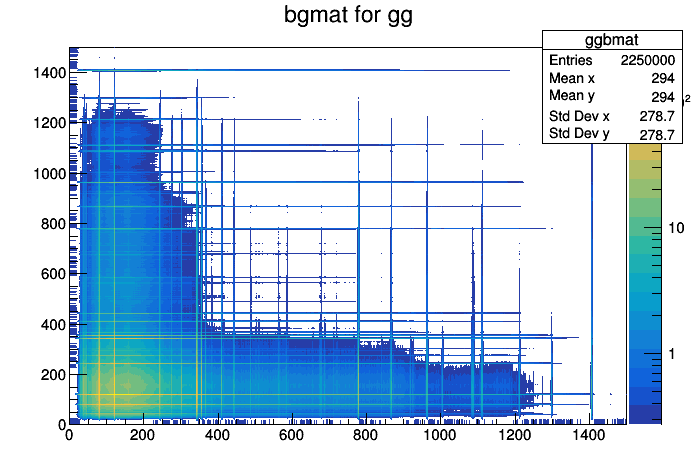

In [20]:
hggb->Draw("colz");
c1->SetLogy(0);
c1->SetLogz();
c1->Draw();

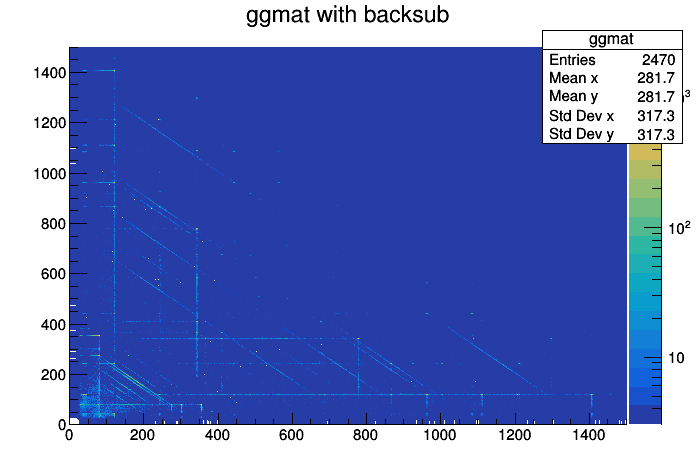

In [23]:
hggmat->Draw("colz");
c1->SetLogy(0);
c1->SetLogz();
c1->Draw();

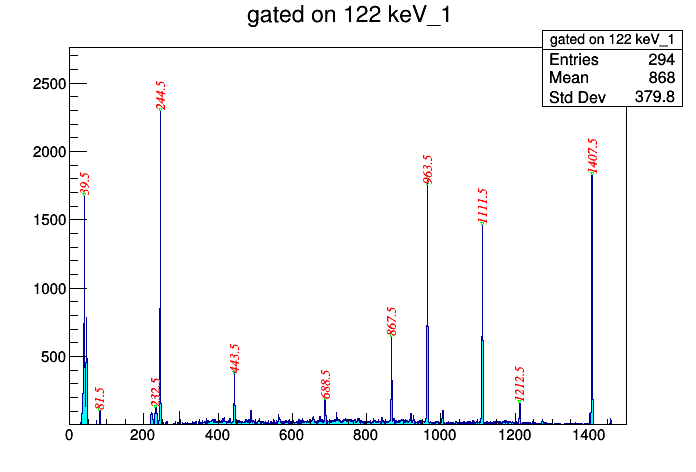

In [22]:
//gated on 121.5keV
ge=122.5;
dge=2;
gea=hggmat->GetXaxis()->FindBin(ge-dge);
geb=hggmat->GetXaxis()->FindBin(ge+dge); 
hname.Form("gated on %d keV_%i",int(ge),ih++);
hg=hggmat->ProjectionX(hname,gea,geb);
hg->SetTitle(hname);
hg->Sumw2(0);
peaks(hname);
c1->SetLogy(0);
c1->Draw();//obivous 121.5keV peak !!!!

# Interactive Generation of level scheme
- Assume a tentative level scheme with branching ratios for different transitions
- Predict the projected spectra in coincidence with gates
- Compare with the observed intensity of g-lines
- Adjust branching ratios to fit counts in peak
- Add new levels & transitions if required
- Continue until satisfied !!
- Spin & parity from angular correlation/polarization data
